In [ ]:
# integrating to see the mass change

In [1]:
import xarray as xr
import numpy as np
import dask
from tqdm import tqdm
import pandas as pd
import xwmb
import xwmt
import xgcm
import warnings
warnings.filterwarnings('ignore')
import math

import numpy as np
import regionate
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import cftime
from datetime import datetime

In [2]:
xwmb.__version__, xwmt.__version__, xgcm.__version__

('0.1.0', '0.1.1', '0.8.2.dev15+g7492277')

In [3]:
hfdrake_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/data_daily/"
ds = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily.*.nc", chunks={"time":1})
snap = xr.open_mfdataset(f"{hfdrake_path}/*.ocean_daily_snap*.nc", chunks={"time":1})
static = xr.open_dataset("/pub/hfdrake/datasets/CM4_MHW_blobs/data/WMT_monthly/ocean_month_rho2.static.nc")

In [4]:
mt_path = "/pub/mariant3/WarmWaterMasses/notebooks/02_mhw_metrics/data_ocetrac-labels/"
blobs = xr.open_dataset(f"{mt_path}/01860503-01901020_ocetrac-labels-region.nc")
labels = blobs.blobs.rename('event_mask')
df = pd.read_pickle(f"{mt_path}/01860503-01901020_mhw-metrics-region.pkl")
wmt = xr.open_dataset("/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/0186-0189_wmt-daily.nc")

In [5]:
budgets = xr.open_dataset("/pub/mariant3/WarmWaterMasses/notebooks/04_WMT-MHW/WMT_data/mhw_wmt-budgets_mass-bounds_0186-0189.nc")
budgets_sum = budgets.sum('mhw')

### Formation plot below 

In [6]:
event = (labels==25).any("time")
event

<xarray.DataArray 'event_mask' (yh: 193, xh: 547)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92

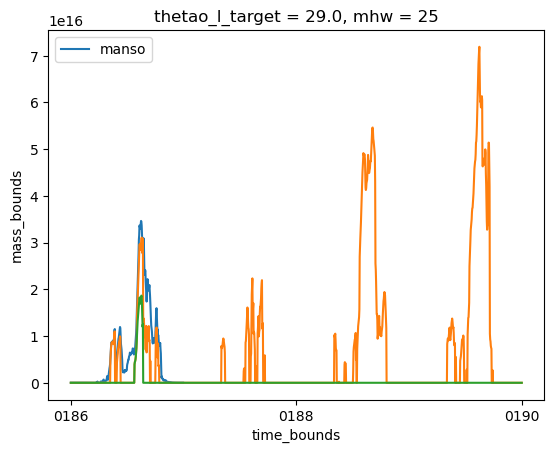

In [5]:
# ΔMManso = wmt.sel(time=slice('0186','0186')).mass_bounds.sel(time_bounds=slice('0186','0186')).sel(thetao_l_target=29,method="nearest")
# ΔMMHW_all = budgets_sum.mass_bounds.sel(thetao_l_target=29,method="nearest")
# ΔMMHW_25 = budgets.sel(mhw=25,method="nearest").mass_bounds.sel(thetao_l_target=29,method="nearest")

# ΔMManso.plot(label='manso')
# ΔMMHW_all.plot()
# ΔMMHW_25.plot()
# plt.legend()

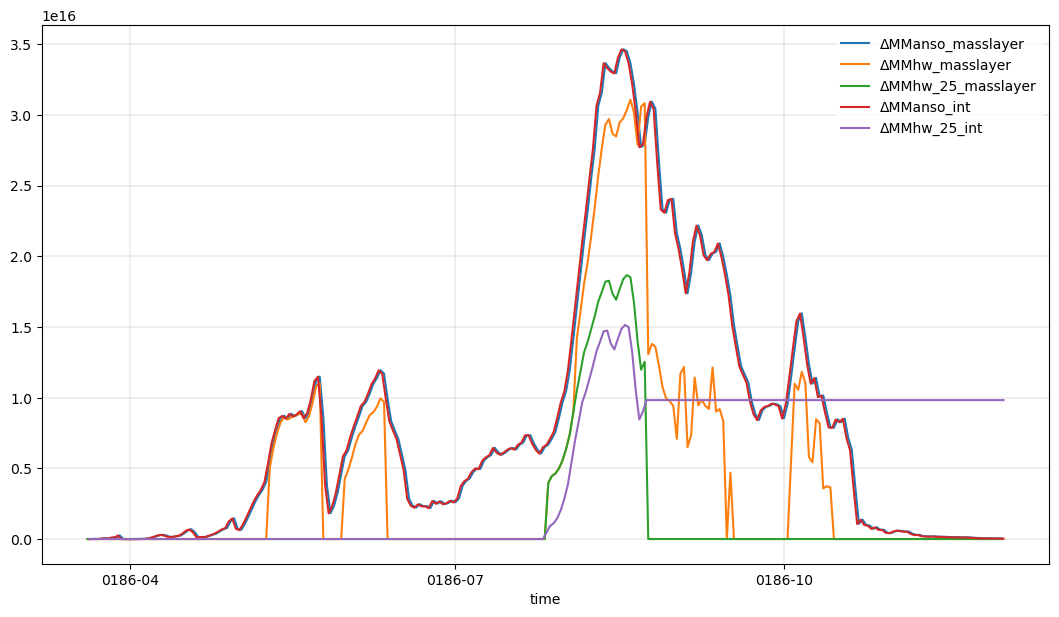

In [7]:
datestart='0186-03-20'
dateened= '0186-12-01'
# datestart="0186"
# dateened="0186"
dsmhw = ds.sel(time=slice(datestart,dateened))

plt.figure(figsize=(13,7))
ΔMManso_mass_bounds = wmt.mass_bounds.sel(thetao_l_target=29,method="nearest").sel(time_bounds=slice(datestart,dateened))
ΔMMhw_all_mass_bounds = budgets_sum.mass_bounds.sel(thetao_l_target=29,method="nearest").sel(time_bounds=slice(datestart,dateened))
ΔMMhw_25_mass_bounds = budgets.sel(mhw=25,method='nearest').mass_bounds.sel(thetao_l_target=29,method="nearest").sel(time_bounds=slice(datestart,dateened))
ΔMManso_int = (wmt['mass_tendency']*wmt.dt).cumsum('time').sel(thetao_l_target=29, method='nearest').sel(time=slice(datestart,dateened))
ΔMMhw_25_int = (budgets.sel(mhw=25,method='nearest').mass_tendency*wmt.dt).cumsum('time').sel(thetao_l_target=29,method="nearest").sel(time=slice(datestart,dateened))
#ΔMMHW_anomaly = (budgets_sum.mass_tendency_anomaly*budgets_sum.dt).sel(thetao_l_target=29, method='nearest').sel(time=slice(datestart,dateened))
#ΔMMHW_anomaly.plot(label="Anomaly")


ΔMManso_mass_bounds.plot(label="ΔMManso_masslayer")
ΔMMhw_all_mass_bounds.plot(label="ΔMMhw_masslayer")
ΔMMhw_25_mass_bounds.plot(label="ΔMMhw_25_masslayer")
ΔMManso_int.plot(label="ΔMManso_int")
ΔMMhw_25_int.plot(label="ΔMMhw_25_int")
plt.legend(edgecolor='w')
plt.grid(True,linewidth=0.3)
plt.title("")
plt.show()

In [8]:
idx_max = ΔMMhw_25_int.argmax()
print(idx_max)
idx_form = np.arange(0, idx_max+1)
print(idx_form)
idx_destroy = np.arange(idx_max, dsmhw.time.size + 2)
print(idx_destroy)

<xarray.DataArray ()>
array(150)
Coordinates:
    thetao_l_target  float64 29.0
    mhw              int64 25
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150]
[150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 

In [9]:
idx_max_manso = ΔMManso_int.argmax()
idx_form_manso = np.arange(0, idx_max_manso+1)
idx_destroy_manso = np.arange(idx_max_manso, dsmhw.time.size + 2)

In [10]:
wmt_manso_sel = wmt.sel(time=slice(datestart,dateened))
wmt_mhw25_sel = budgets.sel(mhw=25,method="nearest").sel(time=slice(datestart,dateened))
wmt_mhw25_sel

<xarray.Dataset>
Dimensions:                                    (time: 257,
                                                thetao_l_target: 440,
                                                time_bounds: 1459,
                                                thetao_i_target: 441, xh: 269,
                                                yh: 130)
Coordinates: (12/13)
  * time                                       (time) object 0186-03-20 12:00...
  * thetao_i_target                            (thetao_i_target) float64 -4.0...
  * time_bounds                                (time_bounds) object 0186-01-0...
  * xh                                         (xh) float64 -137.9 ... -69.91
  * yh                                         (yh) float64 10.2 10.44 ... 39.07
  * thetao_l_target                            (thetao_l_target) float64 -4.0...
    ...                                         ...
    geolon                                     (yh, xh) float32 ...
    areacello                                  (yh, xh) float32 ...
    deptho                                     (yh, xh) float32 ...
    lon                                        (yh, xh) float32 ...
    lat                                        (yh, xh) float32 ...
    mhw                                        int64 25
Data variables: (12/21)
    surface_ocean_flux_advective_negative_lhs  (time, thetao_l_target) float64 ...
    surface_exchange_flux                      (time, thetao_l_target) float64 ...
    diffusion                                  (time, thetao_l_target) float64 ...
    frazil_ice                                 (time, thetao_l_target) float64 ...
    Eulerian_tendency                          (time, thetao_l_target) float64 ...
    bottom_flux                                (time, thetao_l_target) float64 ...
    ...                                         ...
    mass_tendency                              (time, thetao_l_target) float64 ...
    dt                                         (time) float64 0.0 0.0 ... 0.0
    Leibniz_material_derivative                (time, thetao_l_target) float64 ...
    spurious_numerical_mixing                  (time, thetao_l_target) float64 ...
    advection_plus_BC                          (time, thetao_l_target) float64 ...
    diabatic_advection                         (time, thetao_l_target) float64 ...

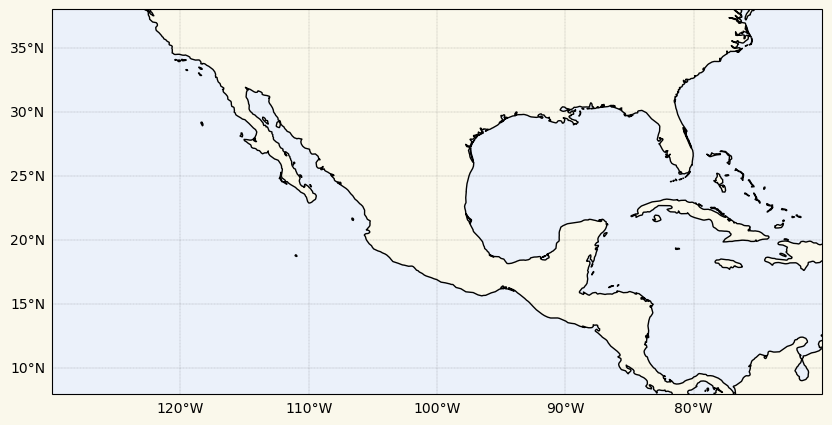

In [11]:
plt.figure(figsize=(10, 5),facecolor='#faf8eb')

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor='#faf8eb')
ax.add_feature(cfeature.OCEAN, facecolor='#ebf1fa')
ax.set_xlim([-130, -70])
ax.set_ylim([8, 38])
#ax.coastlines(color='purple')

event = (labels==25).any("time")
#event.plot.contour(levels=[0.5], colors='r', linewidths=4, linestyles='--') ##3f309c

gl = ax.gridlines(draw_labels=True, linewidth=0.2, color='k', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# ax.spines['geo'].set_edgecolor('#0055ff')#C0
# ax.spines['geo'].set_linewidth(4)

# Set fontsize for x and y axis labels
#gl.xlabel_style = {'size': 28}
#gl.ylabel_style = {'size': 28}
#plt.savefig('/pub/mariant3/WarmWaterMasses/figures/cumulative_mask_manso-only-TALK.png', bbox_inches='tight')

plt.show()

In [116]:
mass_source_color = "#688be3"
convergent_mass_transport_color = "#0d732d"
spurious_numerical_mixing_color = "#9968e3"
boundary_fluxes_color = "#7012fc"
diffusion_color = "#0462d4"
mass_tendency_color = "#db0707"

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import cftime


def plot_wmt(wmt, thetao, time_slice=None, label='manso', figsize=(10, 3), vmin=None, vmax=None, xlim=None, ylim=None,save_path=None):
    """
    Plotting calculated wmt for a given region

    Parameters:
    - wmt
    - thetao: target temperature
    - time_slice: Optional. Write as ('start_date', 'end_date').
      If None, the entire time range will be plotted.
    - label (str): Optional. The label for the plot.
    - figsize (tuple): Optional. Size of the figure (width, height).
    - vmin (float): Optional. Minimum value for color scale.
    - vmax (float): Optional. Maximum value for color scale.

    Returns:
    None
    """
    fontsize=20
    linewidth=2
    dMlinewidth=2
    wmt_sel = wmt.sel(thetao_l_target=thetao, method='nearest')
    
    if time_slice:
        wmt_sel = wmt_sel.sel(time=slice(time_slice[0], time_slice[1]))

    plt.figure(figsize=figsize,facecolor="#faf8eb")
    
    wmt_sel.mass_source.plot(label=r"$\langle \mathcal{S} \rangle$", color="#688be3",linewidth=linewidth)
    wmt_sel.convergent_mass_transport.plot(label=r"$-\langle \Psi\rangle$", color="#0d732d",linewidth=linewidth)
    
    (-wmt_sel.spurious_numerical_mixing).plot(label=r"$\langle \mathcal{-G}^{(S)} \rangle$", color="#9968e3",linewidth=linewidth)
    (-wmt_sel.boundary_fluxes).plot(label=r"$\langle \mathcal{-G}^{(BF)} \rangle$", color="#7012fc",linewidth=dMlinewidth)
    (-wmt_sel.diffusion).plot(label=r"$\langle \mathcal{-G}^{(Mix)} \rangle$", color="#0462d4",linewidth=dMlinewidth)#\mathcal{G}^{mix}
    
    wmt_sel.mass_tendency.plot(label=r"$\partial_{t} \mathcal{M}$",color="#db0707",linewidth=dMlinewidth)


    plt.xlim(wmt_sel.time[0].values,wmt_sel.time[-1].values)
    plt.ylim(-6e+10, 5e+10)#-6e+10  #-8.7e+10, 5.9e+10
    plt.legend(loc=3,frameon=False,bbox_to_anchor=(0.99, 0), fontsize=fontsize)
    plt.title(label,fontsize=18)
    plt.title("")
    plt.grid(True, linewidth=0.1)
    plt.ylabel(r"WMT rate",fontsize=18) #[$10^{10}$ kg/s]
    #plt.ylabel("")
    plt.xlabel("")

    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)

    ax = plt.gca()  # Get the current axes
    ax.set_facecolor("#faf8eb")
    
    
    if vmin is not None and vmax is not None:
        plt.ylim(vmin, vmax)

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        
    plt.show()


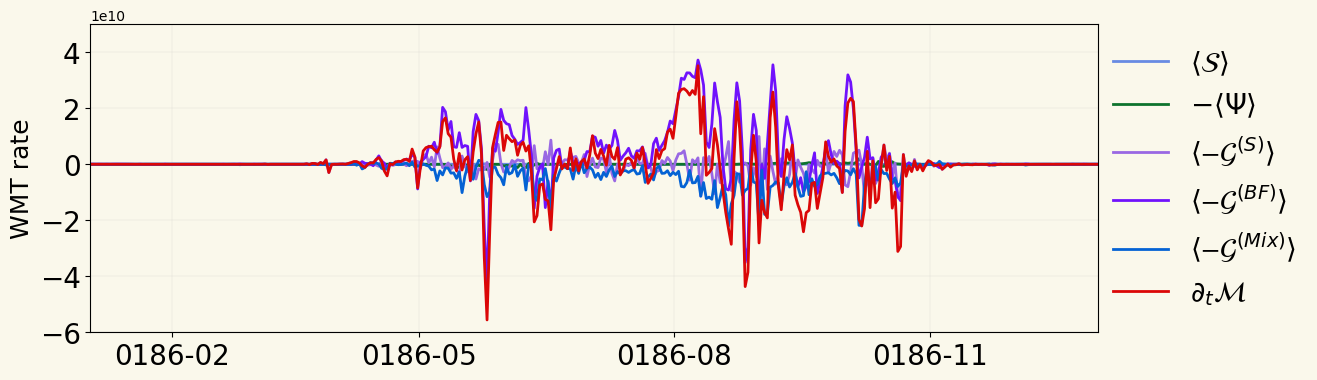

In [113]:
plot_wmt(wmt, thetao=29, label='MANSO',time_slice=('0186','0186'),figsize=(13, 4),vmin=-6e+10,save_path=f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-0186-TALK-legend.png')
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-manso-talk.png', dpi=300, bbox_inches='tight')

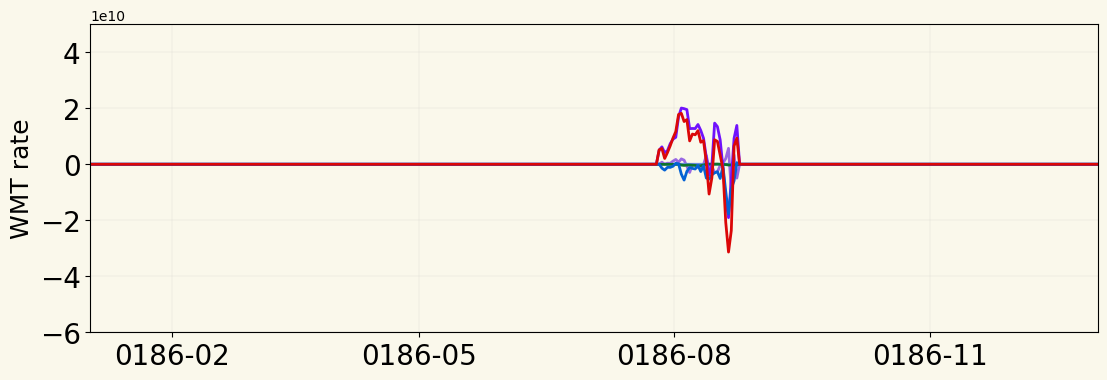

In [76]:
plot_wmt(budgets.sel(mhw=25,method='nearest'), thetao=29, label='MANSO',time_slice=('0186','0186'),figsize=(13, 4),save_path=f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-mhw25-TALK-GMIX.png')
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-manso-talk.png', dpi=300, bbox_inches='tight')

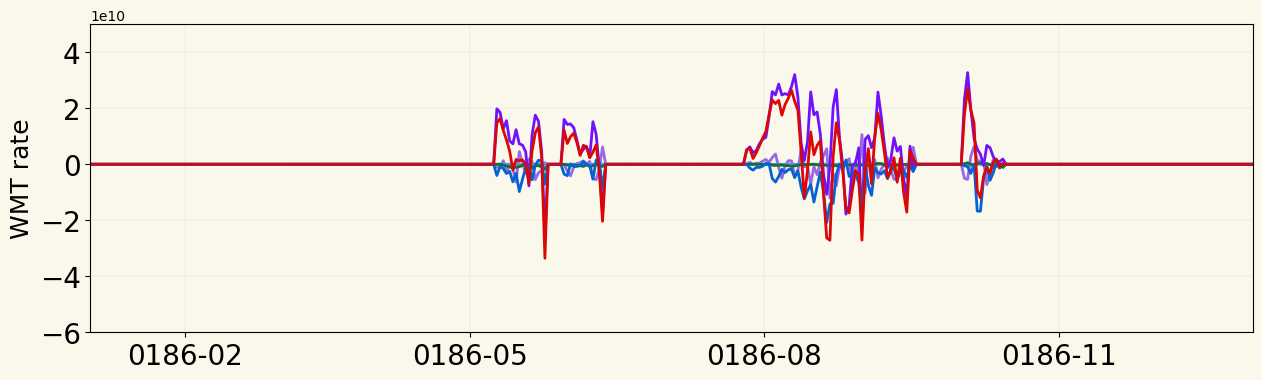

In [78]:
plot_wmt(budgets_sum, thetao=29, label='MANSO',time_slice=('0186','0186'),figsize=(15, 4),save_path=f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-mhws_all-talk.png')
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-manso-talk.png', dpi=300, bbox_inches='tight')

In [ ]:
plot_wmt(budgets_sum, thetao=29, label='MHWs',time_slice=('0186','0190'),figsize=(15, 5),save_path=f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-mhws-all-years-talk.png')

In [ ]:
plot_wmt(budgets.sel(mhw=25,method='nearest'), thetao=29, label='MHW 25',time_slice=('0186','0186'),figsize=(15, 5),save_path=f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-mhw25-talk.png')
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/dmdt-budget-mhw25-talk.png', dpi=300, bbox_inches='tight')

In [123]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_budget(wmt_plot, fontsize, ΔMMHW_mhw, idx_destroy, idx_max, linewidth=5):
    back_color = "#faf8eb"
    mass_source_color = "#688be3"
    convergent_mass_transport_color = "#0d732d"
    spurious_numerical_mixing_color = "#9968e3"
    boundary_fluxes_color = "#7012fc"
    diffusion_color = "#0462d4"
    mass_tendency_color = "#db0707"
    
    fig, ax = plt.subplots(figsize=(13, 7),facecolor=back_color)
    ax.set_facecolor(back_color)

    ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)

    mass_source_mhw = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    mass_source_mhw.plot(color=mass_source_color, label=r"$-\langle \mathcal{S} \rangle$", linewidth=linewidth)

    ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$", linewidth=linewidth, color=boundary_fluxes_color)

    ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$", color=diffusion_color, linewidth=linewidth) ##7932a8

    ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--', alpha=0.2)
    ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=12, markeredgewidth=2, label=r"$\max\{\mathcal{M}(\Theta)\}$")

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔMMHW_mhw[0])
    end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔGsurf.isel(time=idx_max).values)
    ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red', linewidth=linewidth))

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔMMHW_mhw[0])
    end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
    ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='C0', linewidth=linewidth))

    fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
    fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
    ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

    fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
    ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#209cfa', alpha=0.2)

    xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 77).values #82 #53
    xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
    yax = 0.35e17 #ΔMMHW_mhw[idx_max - 3]
    ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=fontsize)
    arrow_form_start = (ΔMMHW_mhw.time.isel(time=idx_max - 31).values, 0.35e17)#ΔMMHW_mhw[idx_max])
    arrow_form_end = (ΔMMHW_mhw.time.isel(time=idx_max - 6).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=linewidth))

    ax.annotate("Destruction", (xaxdes, yax), color="C0", weight="bold", fontsize=fontsize)
    arrow_des_start = (ΔMMHW_mhw.time.isel(time=idx_max + 20).values,0.35e17)# ΔMMHW_mhw[idx_max-3])
    arrow_des_end = (ΔMMHW_mhw.time.isel(time=idx_max + 3).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='C0', linewidth=linewidth))

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_fontsize(fontsize)
    offset_text.set_color(back_color)

    Tmax = '%.1f' % np.round(29, 1)
    plt.title("")
    plt.ylabel(r"$ \mathcal{M}(\mathcal{t})$", fontsize=fontsize)#10$^{17}$ kg

    ax.set_xlabel("")
    vmax=10e+16
    vmin=-10e+16
    plt.ylim(vmin, vmax)
    plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=230).values)
    plt.grid(True, alpha=0.6)

    legend = ax.legend(fontsize=fontsize, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.2)
    legend.get_frame().set_facecolor('#faf8eb')
    #plt.show()

    #plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-MANSO-TALK-background.png', bbox_inches='tight')
#ΔMManso_mass_bounds
#ΔMManso_int

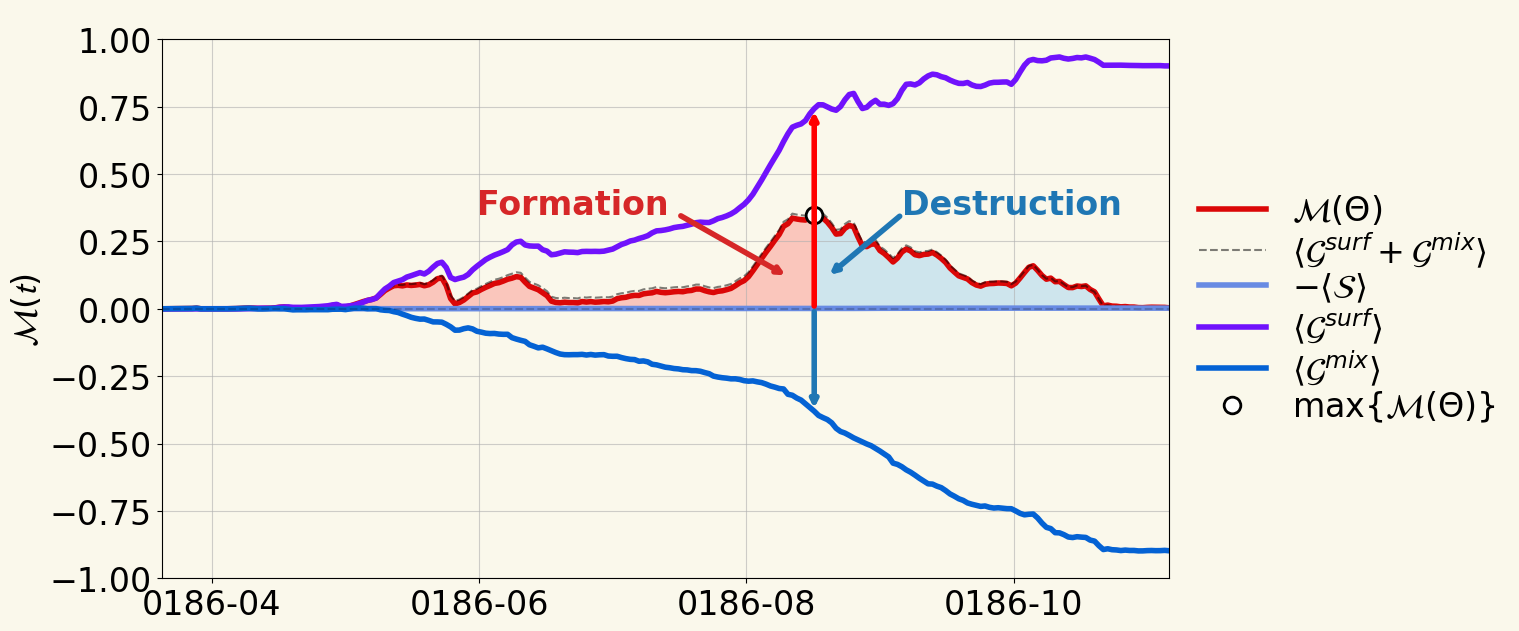

In [124]:
plot_mass_budget(wmt_manso_sel, fontsize=24, ΔMMHW_mhw=ΔMMhw_25_int, idx_destroy=idx_destroy_manso, idx_max=idx_max_manso, linewidth=4)

In [233]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_budget(wmt_plot, fontsize, ΔMMHW_mhw, idx_destroy, idx_max, linewidth=5):
    back_color = "#faf8eb"
    fig, ax = plt.subplots(figsize=(13, 7),facecolor=back_color)
    ax.set_facecolor(back_color)
    mass_source_color = "#688be3"
    convergent_mass_transport_color = "#0d732d"
    spurious_numerical_mixing_color = "#9968e3"
    boundary_fluxes_color = "#7012fc"
    diffusion_color = "#0462d4"
    mass_tendency_color = "#db0707"
    alternate_mass_tendency_color = "#f70275"
    year='0189'
    year_end='0189'
    

    # ΔMMHW_mhw.isel(time_bounds=slice(0, idx_destroy[-1])).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    # ΔMMhw_all_mass_bounds.isel(time_bounds=slice(0, idx_destroy[-1])).plot(color=alternate_mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")

    

    wmt.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    #ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    #ΔMMhw_all_mass_bounds.isel(time_bounds=slice(0, idx_destroy[-1])).plot(color=alternate_mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    budgets_sum.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color=alternate_mass_tendency_color, linewidth=linewidth, label=r"MHW $ \mathcal{M}(\Theta)$")

    # all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    # all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)

    # mass_source_mhw = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    # mass_source_mhw.plot(color=mass_source_color, label=r"$-\langle \mathcal{S} \rangle$", linewidth=linewidth)

    # ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    # ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$", linewidth=linewidth, color=boundary_fluxes_color)

    # ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    # ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$", color=diffusion_color, linewidth=linewidth) ##7932a8

    # ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--', alpha=0.2)
    # ax.plot(ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max), ΔMMHW_mhw.isel(time_bounds=idx_max), 'wo', markeredgecolor='k', markersize=12, markeredgewidth=2, label=r"$\max\{\mathcal{M}(\Theta)\}$")

    # start_point = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max).values, ΔMMHW_mhw[0])
    # end_point = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max).values, ΔGsurf.isel(time=idx_max).values)
    # ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red', linewidth=linewidth))

    # start_point = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max.values).values, ΔMMHW_mhw[0])
    # end_point_des = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
    # ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='#0055ff', linewidth=linewidth))

    # fill_times_form = ΔMMHW_mhw.time_bounds.isel(time_bounds=slice(0, idx_max.values+1)).values
    # fill_deltaM_form = ΔMMHW_mhw.isel(time_bounds=slice(0, idx_max.values+1)).values
    # mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
    # ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

    # fill_times_des = ΔMMHW_mhw.time_bounds.isel(time_bounds=slice(idx_max.values, idx_destroy[-1])).values
    # fill_deltaM_des = ΔMMHW_mhw.isel(time_bounds=slice(idx_max.values, idx_destroy[-1])).values
    # mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
    # ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#0055ff', alpha=0.3)#0055ff #209cfa

    # xaxform = ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max - 77).values #82 #53
    # xaxdes = ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max + 20).values
    # yax = 0.35e17 #ΔMMHW_mhw[idx_max - 3]
    # ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=fontsize)
    # arrow_form_start = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max - 31).values, 0.35e17)#ΔMMHW_mhw[idx_max])
    # arrow_form_end = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max - 6).values, ΔMMHW_mhw[idx_max-15])
    # ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=linewidth))

    # ax.annotate("Destruction", (xaxdes, yax), color="#0055ff", weight="bold", fontsize=fontsize)
    # arrow_des_start = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max + 20).values,0.35e17)# ΔMMHW_mhw[idx_max-3])
    # arrow_des_end = (ΔMMHW_mhw.time_bounds.isel(time_bounds=idx_max + 3).values, ΔMMHW_mhw[idx_max-15])
    # ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='#0055ff', linewidth=linewidth))

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_fontsize(fontsize)
    offset_text.set_color(back_color)

    # Tmax = '%.1f' % np.round(29, 1)
    plt.title("")
    plt.ylabel(r"$ \mathcal{M}(\mathcal{t})$", fontsize=fontsize)#10$^{17}$ kg

    ax.set_xlabel("")
    vmax=10e+16
    vmin=-10e+16
    plt.ylim(vmin, vmax)
    plt.xlim(budgets_sum.time_bounds.sel(time_bounds=year).values[0],budgets_sum.time_bounds.sel(time_bounds=year_end).values[-1])

   # plt.xlim(ΔMMHW_mhw.time_bounds.isel(time_bounds=0).values,ΔMMHW_mhw.time_bounds.isel(time_bounds=230).values)
    plt.grid(True, alpha=0.6)

    legend = ax.legend(fontsize=fontsize, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.2)
    legend.get_frame().set_facecolor('#faf8eb')
    #plt.show()

    plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-all_mhws-TALK-background-{year}-{year_end}-FINAL.png', bbox_inches='tight')
#ΔMManso_mass_bounds
#ΔMManso_int

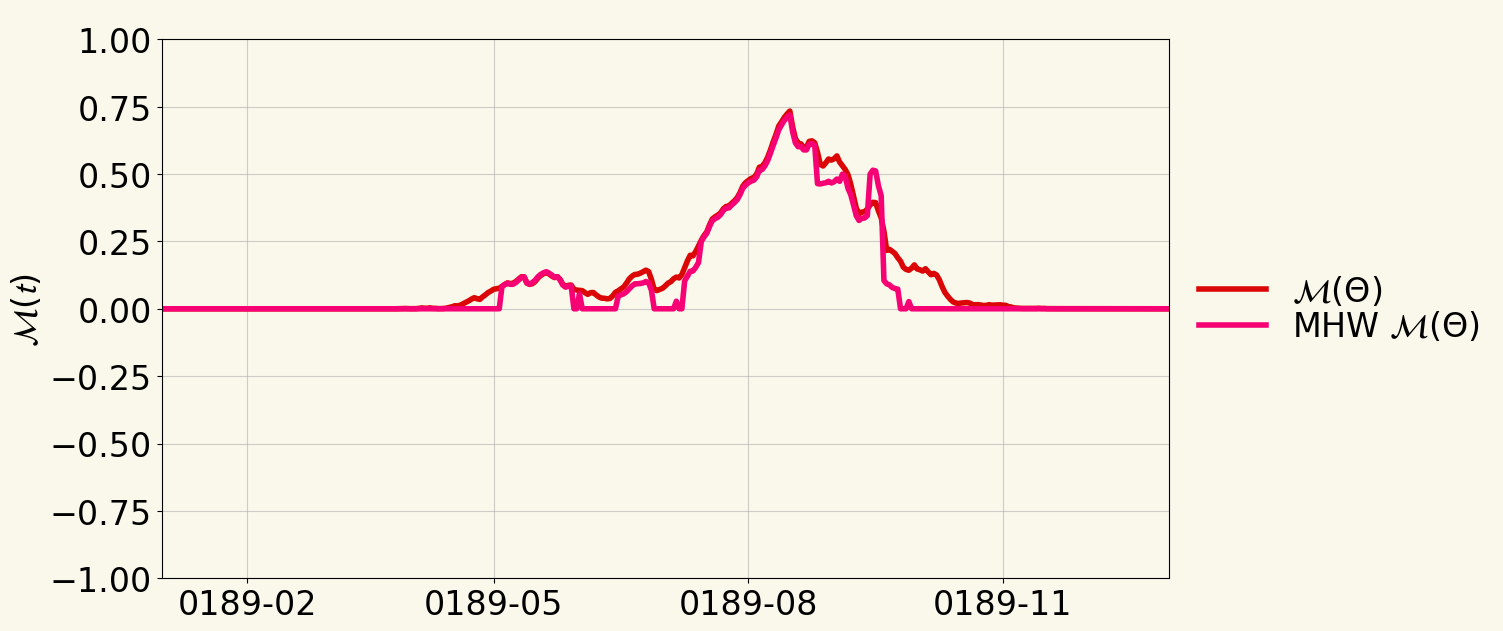

In [234]:
plot_mass_budget(wmt_manso_sel, fontsize=24, ΔMMHW_mhw=ΔMManso_mass_bounds, idx_destroy=idx_destroy_manso, idx_max=idx_max_manso, linewidth=4)

In [217]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_budget(wmt_plot, fontsize, ΔMMHW_mhw, idx_destroy, idx_max, linewidth=5):
    back_color = "#faf8eb"
    fig, ax = plt.subplots(figsize=(13, 7),facecolor=back_color)
    ax.set_facecolor(back_color)
    mass_source_color = "#688be3"
    convergent_mass_transport_color = "#0d732d"
    spurious_numerical_mixing_color = "#9968e3"
    boundary_fluxes_color = "#7012fc"
    diffusion_color = "#0462d4"
    mass_tendency_color = "#db0707"
    alternate_mass_tendency_color = "#f70275"

    year='0186'
    year_end='0189'
    

    wmt.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    #ΔMMHW_mhw.isel(time=slice(0, idx_destroy[-1])).plot(color=mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    #ΔMMhw_all_mass_bounds.isel(time_bounds=slice(0, idx_destroy[-1])).plot(color=alternate_mass_tendency_color, linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
    budgets_sum.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color=alternate_mass_tendency_color, linewidth=linewidth, label=r"MHW $ \mathcal{M}(\Theta)$")

    all_terms = (-(wmt_plot['boundary_fluxes'] + wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    all_terms.plot(color="k", label=r"$\langle \mathcal{G}^{surf}+\mathcal{G}^{mix} \rangle$", ls="--", alpha=0.5)

    mass_source_mhw = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    mass_source_mhw.plot(color=mass_source_color, label=r"$-\langle \mathcal{S} \rangle$", linewidth=linewidth)

    ΔGsurf = (-wmt_plot['boundary_fluxes'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGsurf.plot(label=r"$\langle \mathcal{G}^{surf} \rangle$", linewidth=linewidth, color=boundary_fluxes_color)

    ΔGmix = (-(wmt_plot['diffusion'] + wmt_plot['spurious_numerical_mixing']) * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29)
    ΔGmix.plot(label=r"$\langle \mathcal{G}^{mix} \rangle$", color=diffusion_color, linewidth=linewidth) ##7932a8

    ax.axhline(y=ΔMMHW_mhw[0], color='k', linestyle='--', alpha=0.2)
    ax.plot(ΔMMHW_mhw.time.isel(time=idx_max), ΔMMHW_mhw.isel(time=idx_max), 'wo', markeredgecolor='k', markersize=12, markeredgewidth=2, label=r"$\max\{\mathcal{M}(\Theta)\}$")

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔMMHW_mhw[0])
    end_point = (ΔMMHW_mhw.time.isel(time=idx_max).values, ΔGsurf.isel(time=idx_max).values)
    ax.annotate('', xy=end_point, xytext=start_point, arrowprops=dict(arrowstyle='->', color='red', linewidth=linewidth))

    start_point = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔMMHW_mhw[0])
    end_point_des = (ΔMMHW_mhw.time.isel(time=idx_max.values).values, ΔGmix.isel(time=idx_max.values).values)
    ax.annotate('', xy=end_point_des, xytext=start_point, arrowprops=dict(arrowstyle='->', color='#0055ff', linewidth=linewidth))

    fill_times_form = ΔMMHW_mhw.time.isel(time=slice(0, idx_max.values+1)).values
    fill_deltaM_form = ΔMMHW_mhw.isel(time=slice(0, idx_max.values+1)).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(0, idx_max.values+1)).values
    ax.fill_between(fill_times_form, mass_source_limit, fill_deltaM_form, color='red', alpha=0.2)

    fill_times_des = ΔMMHW_mhw.time.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    fill_deltaM_des = ΔMMHW_mhw.isel(time=slice(idx_max.values, idx_destroy[-1])).values
    mass_source_limit = (wmt_plot['mass_source'] * wmt_plot.dt).cumsum('time').interp(thetao_l_target=29).isel(time=slice(idx_max.values, idx_destroy[-1])).values
    ax.fill_between(fill_times_des, mass_source_limit, fill_deltaM_des, color='#0055ff', alpha=0.3)#0055ff #209cfa

    xaxform = ΔMMHW_mhw.time.isel(time=idx_max - 77).values #82 #53
    xaxdes = ΔMMHW_mhw.time.isel(time=idx_max + 20).values
    yax = 0.35e17 #ΔMMHW_mhw[idx_max - 3]
    ax.annotate("Formation", (xaxform, yax), color="C3", weight="bold", fontsize=fontsize)
    arrow_form_start = (ΔMMHW_mhw.time.isel(time=idx_max - 31).values, 0.35e17)#ΔMMHW_mhw[idx_max])
    arrow_form_end = (ΔMMHW_mhw.time.isel(time=idx_max - 6).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_form_end, xytext=arrow_form_start, arrowprops=dict(arrowstyle='->', color='C3', linewidth=linewidth))

    ax.annotate("Destruction", (xaxdes, yax), color="#0055ff", weight="bold", fontsize=fontsize)
    arrow_des_start = (ΔMMHW_mhw.time.isel(time=idx_max + 20).values,0.35e17)# ΔMMHW_mhw[idx_max-3])
    arrow_des_end = (ΔMMHW_mhw.time.isel(time=idx_max + 3).values, ΔMMHW_mhw[idx_max-15])
    ax.annotate('', xy=arrow_des_end, xytext=arrow_des_start, arrowprops=dict(arrowstyle='->', color='#0055ff', linewidth=linewidth))

    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    offset_text = ax.yaxis.get_offset_text()
    offset_text.set_fontsize(fontsize)
    offset_text.set_color(back_color)

    # Tmax = '%.1f' % np.round(29, 1)
    plt.title("")
    plt.ylabel(r"$ \mathcal{M}(\mathcal{t})$", fontsize=fontsize)#10$^{17}$ kg

    ax.set_xlabel("")
    vmax=10e+16
    vmin=-10e+16
    plt.ylim(vmin, vmax)
    plt.xlim(ΔMMHW_mhw.time.isel(time=0).values,ΔMMHW_mhw.time.isel(time=230).values)
    plt.grid(True, alpha=0.6)

    legend = ax.legend(fontsize=fontsize, labelspacing=0.05, handlelength=2, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
    legend.get_frame().set_edgecolor('gray')
    legend.get_frame().set_linewidth(0.2)
    legend.get_frame().set_facecolor('#faf8eb')
    #plt.show()

    plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-mhw25-TALK-background-FINAL.png', bbox_inches='tight')
#ΔMManso_mass_bounds
#ΔMManso_int

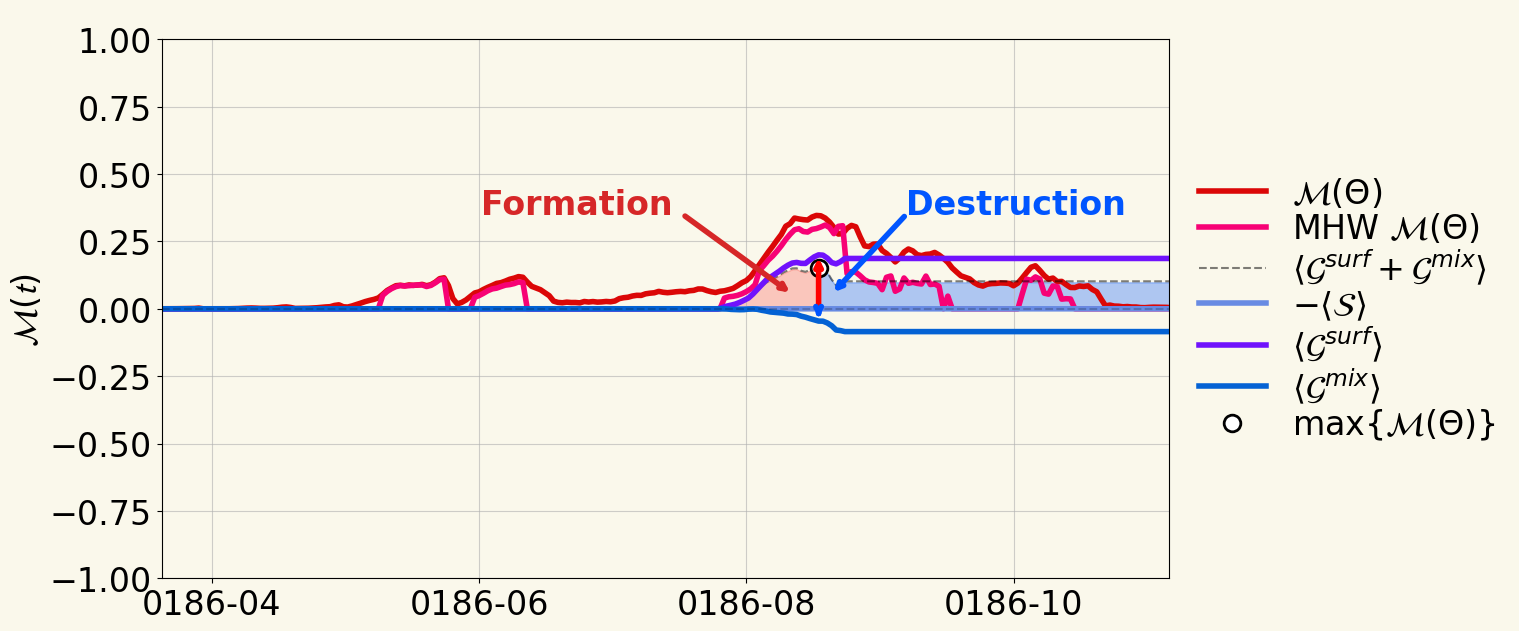

In [218]:
plot_mass_budget(wmt_mhw25_sel, fontsize=24, ΔMMHW_mhw=ΔMMhw_25_int, idx_destroy=idx_destroy, idx_max=idx_max, linewidth=4)

In [ ]:
wmt.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice('0186', '0189')).plot()

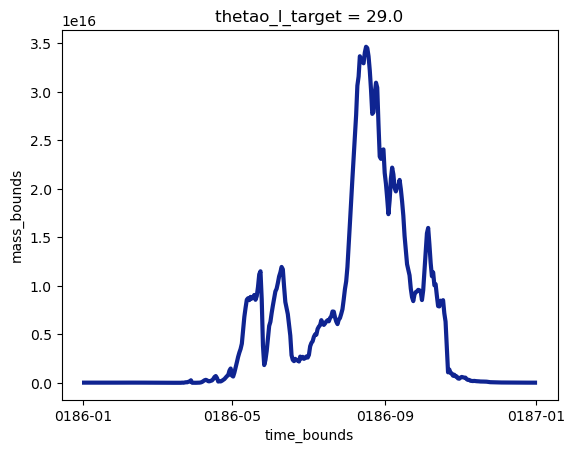

In [166]:
wmt.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color="#0f2491", linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")

In [204]:
budgets_sum.time_bounds.sel(time_bounds=year).values[-1]

cftime.DatetimeNoLeap(186, 12, 31, 0, 0, 0, 0, has_year_zero=True)

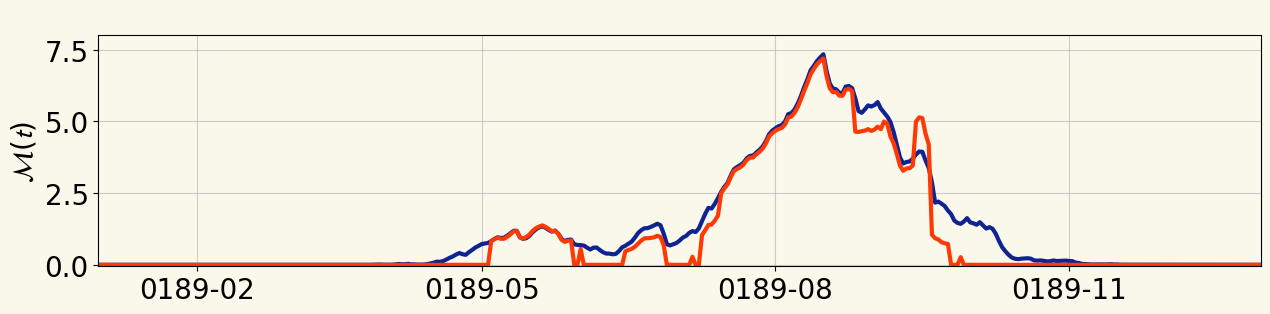

In [221]:
back_color = "#faf8eb"
fig, ax = plt.subplots(figsize=(15, 3),facecolor=back_color)
ax.set_facecolor(back_color)
linewidth=3
fontsize=20
year='0186'
year_end='0189'

wmt.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color="#0f2491", linewidth=linewidth, label=r"$ \mathcal{M}(\Theta)$")
budgets_sum.mass_bounds.sel(thetao_l_target=29,method='nearest').sel(time_bounds=slice(year, year_end)).plot(color="#ff3903", linewidth=linewidth, label=r"MHW $ \mathcal{M}(\Theta)$")


ax.tick_params(axis='both', which='major', labelsize=fontsize)
offset_text = ax.yaxis.get_offset_text()
offset_text.set_fontsize(fontsize)
offset_text.set_color(back_color)

# Tmax = '%.1f' % np.round(29, 1)
plt.title("")
plt.ylabel(r"$ \mathcal{M}(\mathcal{t})$", fontsize=fontsize)#10$^{17}$ kg

ax.set_xlabel("")
vmax=10e+16
vmax=8e+16
vmin= -0.05e+16
#vmin=-10e+16
plt.ylim(vmin, vmax)
plt.xlim(budgets_sum.time_bounds.sel(time_bounds=year_end).values[0],budgets_sum.time_bounds.sel(time_bounds=year_end).values[-1])
plt.grid(True, alpha=0.6)
plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/cumulative-mass-budget-MANSO-MHWs-{year}-{year_end}-TALK-background.png', bbox_inches='tight')

In [187]:
budgets_sum.time_bounds.isel(time_bounds=-1).values

array(cftime.DatetimeNoLeap(189, 12, 31, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [186]:
budgets_sum.time_bounds.isel(time_bounds=-1).values

array(cftime.DatetimeNoLeap(189, 12, 31, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)

In [ ]:
plt.figure(figsize=(10, 4))
ΔMManso = (wmt['mass_tendency']*wmt.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')#.sel(time=slice('0187','0187'))
ΔMManso.plot(label=r"$ \mathcal{M}(\Theta)$ MANSO",color='#0f2491',linewidth=2)
ΔMMHW = (budgets_sum['mass_tendency']*budgets_sum.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')#.sel(time=slice('0187','0187'))
#ΔMMHW.plot(label=r"$ \mathcal{M}(\Theta)$ MHWs",color='#ed0e0e',linewidth=2)
ΔMMHW_anomaly = (budgets_sum.mass_tendency_anomaly*budgets_sum.dt).sel(thetao_l_target=29, method='nearest')#.sel(time=slice('0187','0187'))
ΔMMHW_anomaly.plot(label=r"$ \mathcal{M}(\Theta)$ Anomaly of MHWs",color='g',linewidth=2)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel(r"Cumulative WMT",fontsize=12)
plt.xlabel("")
plt.title("")

plt.legend(loc=2,frameon=False,fontsize=12)#,bbox_to_anchor=(1,-0.09))
#plt.savefig(f'/pub/mariant3/WarmWaterMasses/figures/mass_budget/masschange-budget-manso-anomaly-all-years-talk.png', dpi=300, bbox_inches='tight')

plt.show()

In [247]:
(ΔMMhw_25_mass_bounds.mean('time_bounds')/ΔMManso_mass_bounds.mean('time_bounds')*100).values

array(17.27386117)

In [260]:
year = '0189'
(budgets_sum.mass_bounds.sel(thetao_l_target=29,method="nearest").sel(time_bounds=slice(year,year)).mean('time_bounds')/wmt.mass_bounds.sel(thetao_l_target=29,method="nearest").sel(time_bounds=slice(year,year)).mean('time_bounds')*100).values

array(82.44569302)

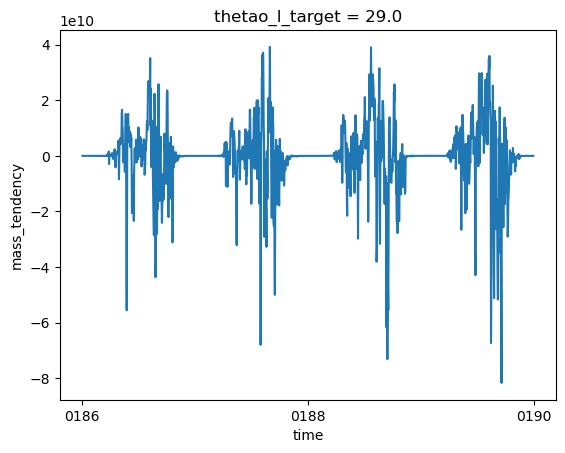

In [9]:
wmt.mass_tendency.sel(thetao_l_target=29,method="nearest").plot()

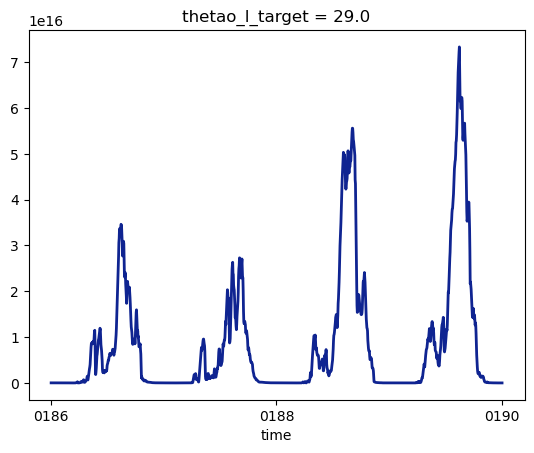

In [11]:
ΔMManso = (wmt['mass_tendency']*wmt.dt).cumsum('time').sel(thetao_l_target=29, method='nearest')#.sel(time=slice('0187','0187'))
ΔMManso.plot(label=r"$ \mathcal{M}(\Theta)$ MANSO",color='#0f2491',linewidth=2)